In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import glob
import pandas as pd
import os
import seaborn as sns

from tqdm import tqdm
from statsmodels.distributions.empirical_distribution import ECDF
from collections import defaultdict
import pickle
import re
import json
from pathlib import Path


from open_spiel.python.algorithms.exploitability import nash_conv, best_response
from open_spiel.python.algorithms.ubc_exploitability import game_tree_size

from open_spiel.python.examples.ubc_plotting_utils import *
from open_spiel.python.examples.ubc_sample_game_tree import sample_game_tree, flatten_trees, flatten_tree
from open_spiel.python.examples.ubc_sample_game_tree import NodeType

from auctions.webutils import *

from open_spiel.python.algorithms.random_agent import RandomAgent
import bokeh
from bokeh.layouts import row, column
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource, ColorBar, LogColorMapper, LinearColorMapper
from bokeh.transform import linear_cmap, log_cmap
from bokeh.palettes import Category10_10, Magma256, Spectral10, Category20_20
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
from collections import defaultdict
from open_spiel.python.examples.ppo_eval import run_eval
from open_spiel.python.examples.ppo_utils import run_ppo, read_ppo_config

output_notebook()

Loading BokehJS ...

In [2]:
config = read_ppo_config('jan19/ppo_70')
config['seed'] = 12
env_and_policy = env_and_policy_for_dry_run(Game.objects.get(name='jan12_regional_vs_national_base.json'), config, env_params=None)

{'num_envs': 4, 'steps_per_batch': 64, 'num_minibatches': 8, 'update_epochs': 8, 'learning_rate': 3e-05, 'num_annealing_updates': None, 'gae': True, 'gamma': 1.0, 'gae_lambda': 0.9352372943667073, 'normalize_advantages': True, 'clip_coef': 0.029514131029061648, 'clip_vloss': False, 'agent_fn': 'AuctionNet', 'agent_fn_kwargs': {'activation': 'relu', 'add_skip_connections': True, 'hidden_sizes': [64, 64, 64]}, 'entropy_coef': 0.001352796489917987, 'value_coef': 0.307229682702617, 'max_grad_norm': 0.5, 'target_kl': None, 'device': 'cpu', 'use_wandb': False, 'anneal_lr': True, 'track_stats': True}


In [13]:
model = env_and_policy.agents[0].network

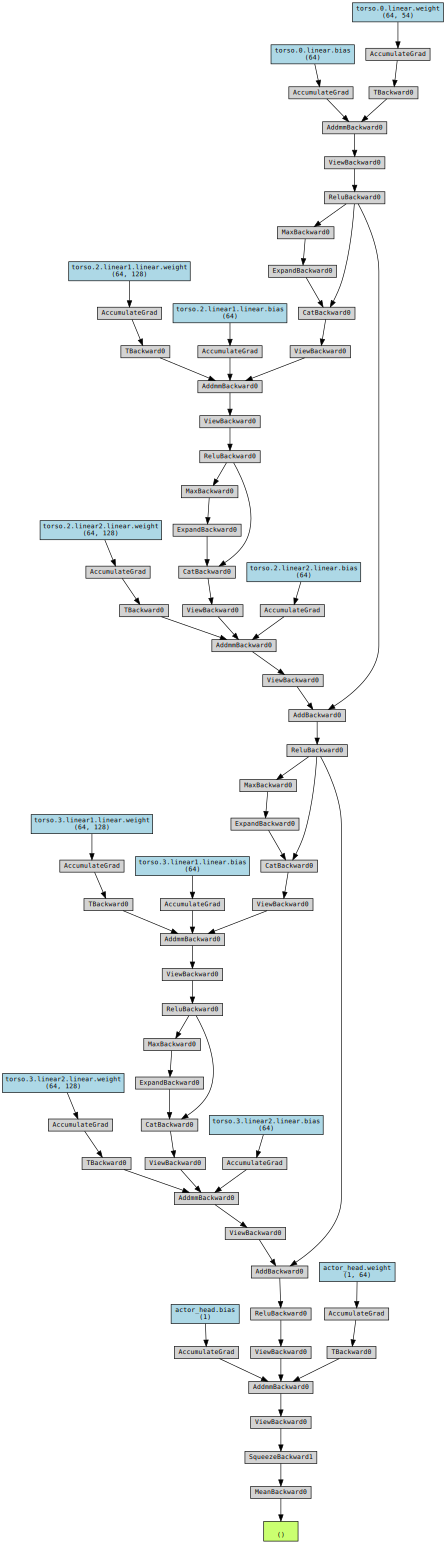

In [31]:
X = torch.rand([4, 27, 64])
y = model(X)
from torchviz import make_dot
make_dot(y[0].mean(), params=dict(model.named_parameters()))

In [ ]:

model = env_and_policy.agents[0]
y = model(X)


In [24]:
first_parameter = next(model.parameters())
input_shape = first_parameter.size()
input_shape

torch.Size([64, 54])

In [27]:
torch.rand(20, 64, 54).shape

torch.Size([20, 64, 54])

In [26]:
model(torch.rand(20, 64, 54))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1080x128 and 54x64)

In [25]:
list(model.parameters())[0].shape

torch.Size([64, 54])

In [33]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("torchlogs/")
writer.add_graph(model, X)
writer.close()
